In [1]:
import numpy as np
from scipy import sparse
from scipy import stats
import matplotlib.pyplot as plt
import nmarkov as nm

## Set CTMC kernel and the first derivative

In [2]:
Q=sparse.csc_matrix(np.array([[-5,2,3],[2,-3,1],[1,1,-2]], dtype=np.float))
dQ = np.array([[-1,1,0],[0,0,0],[0,0,0]], dtype=np.float)

## Set initial probability vector and reward vector

In [3]:
x0=np.array([1,0,0])
rwd=np.array([1,10,0])

## Transient solution: State probabilities and sojourn times in [0,1]

In [4]:
v=nm.tprob(Q=Q, x0=x0, t=np.linspace(0, 1, num=100))

In [5]:
v['prob'].reshape(100,3)

array([[1.        , 0.        , 0.        ],
       [0.95109279, 0.01955302, 0.02935419],
       [0.90524703, 0.03786302, 0.05688995],
       [0.86227092, 0.05500856, 0.08272052],
       [0.82198465, 0.07106326, 0.10695209],
       [0.78421969, 0.0860961 , 0.12968422],
       [0.74881809, 0.10017169, 0.15101022],
       [0.71563178, 0.1133506 , 0.17101761],
       [0.684522  , 0.12568958, 0.18978842],
       [0.65535866, 0.13724177, 0.20739957],
       [0.62801983, 0.14805699, 0.22392318],
       [0.60239124, 0.15818191, 0.23942685],
       [0.57836577, 0.16766025, 0.25397398],
       [0.55584301, 0.176533  , 0.267624  ],
       [0.53472884, 0.18483851, 0.28043264],
       [0.51493506, 0.19261277, 0.29245217],
       [0.49637898, 0.19988946, 0.30373156],
       [0.4789831 , 0.20670015, 0.31431675],
       [0.46267477, 0.2130744 , 0.32425083],
       [0.44738589, 0.21903994, 0.33357417],
       [0.43305265, 0.2246227 , 0.34232465],
       [0.41961522, 0.22984701, 0.35053778],
       [0.

## Rewards in [0,1]

In [6]:
x=nm.trwd(Q=Q, x0=x0, t=np.linspace(0, 1, num=100), rwd=rwd)

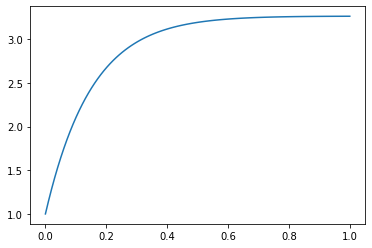

In [7]:
plt.plot(x['t'], x['irwd'])
plt.show()

## Steady-state probability

In [8]:
pis = nm.sprob(Q)
print(pis)

[0.2173913  0.30434783 0.47826087]


## Sensitivity of steady-state probability

In [9]:
nm.ssen(Q, b=pis @ dQ, pis=pis)

array([-0.02835539,  0.04725898, -0.01890359])

## Sensitivity of reward in [0,1]

In [10]:
Q2 = nm.rblock(nm.cblock(Q, dQ), nm.cblock(np.zeros((3,3)), Q))
Q2.tocoo().toarray()

array([[-5.,  2.,  3., -1.,  1.,  0.],
       [ 2., -3.,  1.,  0.,  0.,  0.],
       [ 1.,  1., -2.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -5.,  2.,  3.],
       [ 0.,  0.,  0.,  2., -3.,  1.],
       [ 0.,  0.,  0.,  1.,  1., -2.]])

In [11]:
s0 = np.hstack((x0, np.zeros(3)))
r1 = np.hstack((np.zeros(3),rwd))
r2 = np.hstack((rwd, np.zeros(3)))
r = np.vstack((r1,r2)).T
print(s0)
print(r)

[1. 0. 0. 0. 0. 0.]
[[ 0.  1.]
 [ 0. 10.]
 [ 0.  0.]
 [ 1.  0.]
 [10.  0.]
 [ 0.  0.]]


In [12]:
x=nm.trwd(Q=Q2, x0=s0, t=np.linspace(0, 1, num=100), rwd=r)

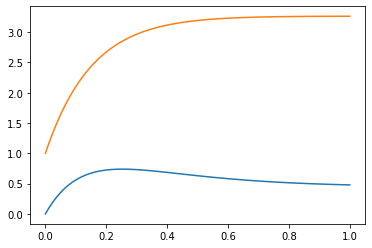

In [13]:
plt.plot(x['t'], x['irwd'])
plt.show()

## Mixture of matrix exponential

- integrate the matrix exponential with gamma ditribution with scale = 0.01 and shape = 2

In [14]:
nm.mexpAx_mix(Q, f=stats.gamma.pdf, scale=0.01, a=2)

array([[0.69973495, 0.11937116, 0.18089389],
       [0.11202255, 0.80073459, 0.08724286],
       [0.06519703, 0.07254564, 0.86225732]])

In [18]:
nm.cmexpAx_mix(Q, f=stats.gamma.pdf, scale=1, a=2)

(array([[0.21801851, 0.30412742, 0.47785407],
        [0.21747564, 0.30551649, 0.47700787],
        [0.21705254, 0.30370432, 0.47924314]]),
 array([[ 4.84868621,  6.57093891, 10.31957173],
        [ 4.71828544,  6.78799145, 10.23291995],
        [ 4.67495955,  6.52761302, 10.53662427]]))